# First let's import, then look for the assignment below

In [26]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Task 1: Define DFA Even010

<font size="4">    
Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that accepts an even number of NON-OVERLAPPING occurrences of $010$s. Thoroughly document your construction!
    
HERE ARE EXAMPLES :

* 01010 - does NOT have an even number of 0's because we wanted NON-OVERLAPPING

* 0101010 - has two NON-OVERLAPPING occurrences of 010 -- that is what we want!

* 0101111010 - has two NON-OVERLAPPING occurrences of 010

* 111111 - has ZERO occurrences of 010
    
</font>

### Hint: Name states to remember the essence of the history of inputs so far. If you do so, and also keep the sense of where the machine is (in an I state, an IF state or an F state), then you'll have the solution fall out automatically!

Please read the Jove_User_Manual and heed the advice given there regarding how to write your automaton markdowns, how to place comments, how to group the lines of a DFA per state, and how to order which transition you may first consider.


In [27]:
Even010 = md2mc('''
DFA 
!! Switch between even and odd. Parse 010, then start looking for the next 010.

!!the beginning
IF_even : 0 -> F_even_0
IF_even : 1 -> IF_even

!!Keep taking 0's until we find a 1
F_even_0 : 0 -> F_even_0
F_even_0 : 1 -> F_even_01


F_even_01 : 0 -> odd
!!011... start back at the beginning.
F_even_01 : 1 -> IF_even

!!if odd count 010, 0 begins the even 010
odd : 0 -> odd_0
!!if odd count 010, we need another 010.
odd : 1 -> odd


odd_0 : 0 -> odd_0
odd_0 : 1 -> odd_01

odd_01 : 0 -> IF_even
odd_01 : 1 -> odd


 
''')

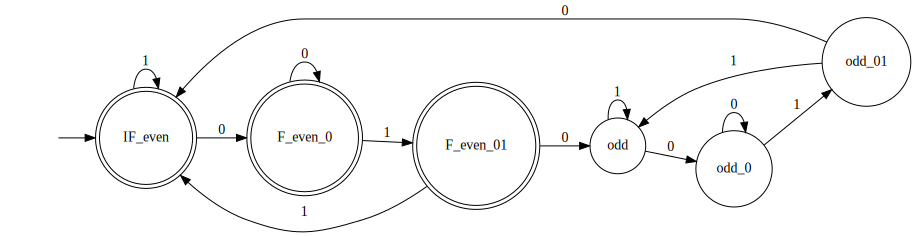

In [28]:
dotObj_dfa(Even010)

The following test should output:

`{ '0101010', '0101111010' } `

In [29]:
list(filter(lambda x : accepts_dfa(Even010, x), ["01010", "0101010", "0101111010", "111111"]))

['0101010', '0101111010', '111111']

# Task 2: Define DFA Ends010

<font size="4">    
3. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that ends in a $010$, calling it Ends010. Then obtain the intersection with the Even010 machine using intersect_dfa. 
    
    Call the intersection Even010_Ends010.
    
    Next, minimize Even010_Ends010, storing it in min_Even010_Ends010 .
    
    Again, document the construction thoroughly.
    
</font>

### Hint: Define a machine for "ends $010$" as illustrated by DFA Even010, and negate.

In [30]:
Ends010 =  md2mc('''
DFA

!! At this point, we are still looking for 010
I: 1 -> I
I: 0 -> 0

!! We have the first 0, now we need a 1
0: 0 -> 0
0: 1 -> 01

!! We have 01, now we need 0
01: 0 -> F_010
01: 1 -> I

!!010 - if we add a 0, go back to 0.
F_010 : 0 -> 0
!! If we add a 1, go back to 01
F_010 : 1 -> 01
''')

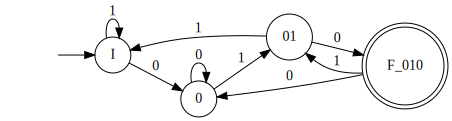

In [31]:
# Let's see the "Ends010" machine
dotObj_dfa(Ends010, FuseEdges=True)

## Obtain the intersection of Even010 and Ends010

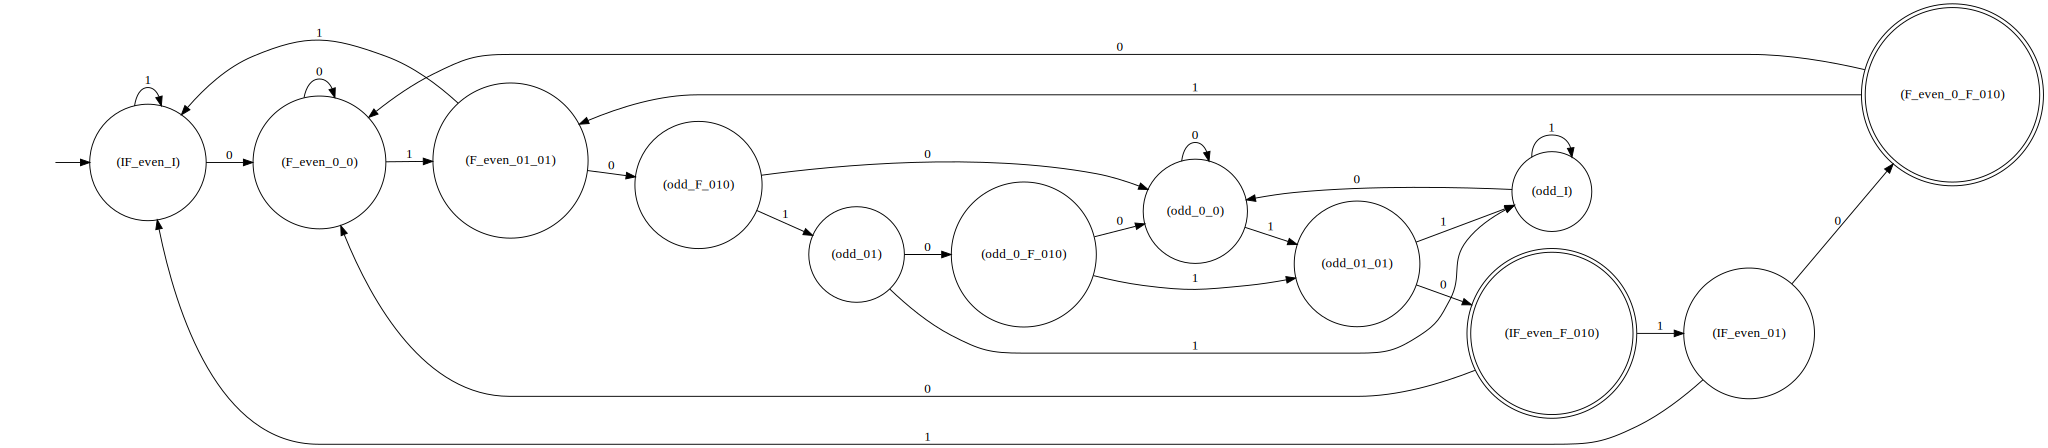

In [32]:
Even010_Ends010 = intersect_dfa(Even010, Ends010)
#... Use intersect_dfa here - help(intersect_dfa) for guidance...
dotObj_dfa(Even010_Ends010)

## Minimize the intersection of Even010 and Ends010

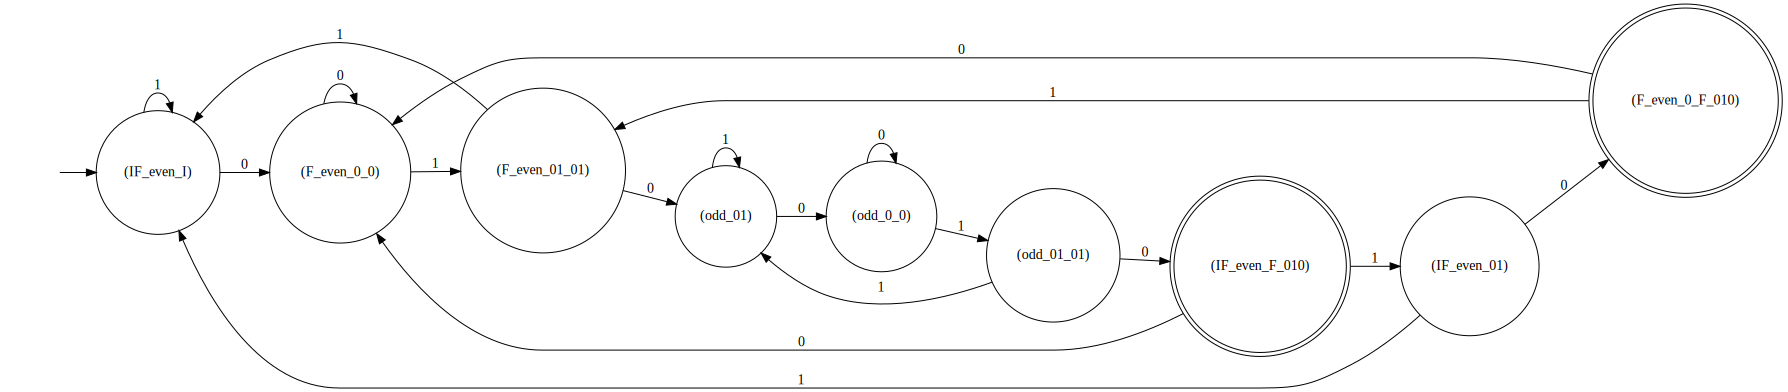

In [33]:
min_Even010_Ends010 = min_dfa(Even010_Ends010)
#... Use min_dfa - help(min_dfa) for guidance ...
dotObj_dfa(min_Even010_Ends010)

# Task 3: Examine Why Minimization Implies Elimination
<font size="4">    
    
Find out which states were eliminated in the Minimization Process. Explain why it was OK to leave these states out. Test the constructed machine using the template given to you. Finally use the Python "filter" function that filters out the accepted strings.
    
</font>

## Find out which states were eliminated

In [34]:
# Hint: You can obtain the components of a DFA D by using the notation D["Q"] where
# D is a DFA created using the md2mc command. Basically, "D" is a dictionary and 
# D["Q"] obtains the value of the key at "Q". See the lecture slides for Lec-3.

In [35]:
Even010_Ends010['Q']

{('F_even_0', '0'),
 ('F_even_0', 'F_010'),
 ('F_even_01', '01'),
 ('IF_even', '01'),
 ('IF_even', 'F_010'),
 ('IF_even', 'I'),
 ('odd', '01'),
 ('odd', 'F_010'),
 ('odd', 'I'),
 ('odd_0', '0'),
 ('odd_0', 'F_010'),
 ('odd_01', '01')}

In [36]:
min_Even010_Ends010['Q']

{('F_even_0', '0'),
 ('F_even_0', 'F_010'),
 ('F_even_01', '01'),
 ('IF_even', '01'),
 ('IF_even', 'F_010'),
 ('IF_even', 'I'),
 ('odd', '01'),
 ('odd_0', '0'),
 ('odd_01', '01')}

In [37]:
Even010_Ends010['Q'] -  min_Even010_Ends010['Q']

{('odd', 'F_010'), ('odd', 'I'), ('odd_0', 'F_010')}

## Explain why it is OK to leave these states out

A template to guide your answer is below.

I'm not sure I understand what I'm supposed to do here.

<font size="4"> 
... Your explanations here - a template of your answer is as follows ...
    
**This template tries to limit the number of cases you have to list**
 
 
 * I find that state SOMESTATE1 is present in DFA1 but SOMESTATE1 is absent in DFA2 
 
 
   - I can obtain this info by doing DFA1["Q"] - DFA2["Q"]
   - I can also eye-ball the diagrams and spot the missing state
   - But I recall that in the diagram, a state may show up P_Q while in the DFA1["Q"] - DFA2["Q"] printout, it may show up as ('P','Q')
 
 
 
 * If there are multiple *SOMESTATE1* that are missing in DFA2, please pick the one that involves state letter 'I'  and call that the *SOMESTATE1* for the remaining questions BELOW
 
 
 **IMPORTANT CHANGE:** __Due to some non-reproducibility lurking in Jove, some people may not get a state containing "I". In that case, pick any one state that is missing, and answer the remaining questions.__
 
 * But I find that THIS STRING (pick the shortest string in numeric order) that reached SOMESTATE1 in DFA1 is now reaching state SOMESTATE2 in DFA2
 
 * Thus I conclude that state SOMESTATE1 and SOMESTATE2 are equivalent
 
 * This is further confirmed by the fact that (**here I am limiting your checks to 3 cases**)
   - upon 0, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
   - upon 1, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
   upon 01, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
 
 

 
 
    
</font>

 * I find that state ODD_I is present in DFA1 but ODD_I is absent in DFA2 
 * But I find that "010011" (pick the shortest string in numeric order) that reached ODD_I in DFA1 is now reaching state odd_01 in DFA2
 
 * Thus I conclude that state ODD_I and odd_01 are equivalent
 
 * This is further confirmed by the fact that (**here I am limiting your checks to 3 cases**)
   - upon 0, ODD_I goes to odd_0_0 while odd_01 goes to odd_0_F_010 and they are BOTH NON-ACCEPTING
   - upon 1, ODD_I goes to ODD_I while odd_01 goes to ODD_I and they are BOTH NON-ACCEPTING.
   upon 01, ODD_I goes to odd_01_01 while odd_01 goes to odd_01_01 and they are BOTH NON-ACCEPTING

# Testing the machine

In [38]:
help(nthnumeric)

Help on function nthnumeric in module jove.LangDef:

nthnumeric(N, S=['a', 'b'])
    Assume S ('Sigma') is a 2-sized list of chars (default ['a','b']). 
    Produce the Nth string in numeric order, where N >= 0.
    Idea : Given N, get b = floor(log_2(N+1)) - need that 
    many places; what to fill in the places is the binary 
    code for N - (2^b - 1) with 0 as S[0] and 1 as S[1].



## Test the constructed machine the "direct" way

In [39]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(256) ]

In [40]:
TestList

['',
 '0',
 '1',
 '00',
 '01',
 '10',
 '11',
 '000',
 '001',
 '010',
 '011',
 '100',
 '101',
 '110',
 '111',
 '0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111',
 '00000',
 '00001',
 '00010',
 '00011',
 '00100',
 '00101',
 '00110',
 '00111',
 '01000',
 '01001',
 '01010',
 '01011',
 '01100',
 '01101',
 '01110',
 '01111',
 '10000',
 '10001',
 '10010',
 '10011',
 '10100',
 '10101',
 '10110',
 '10111',
 '11000',
 '11001',
 '11010',
 '11011',
 '11100',
 '11101',
 '11110',
 '11111',
 '000000',
 '000001',
 '000010',
 '000011',
 '000100',
 '000101',
 '000110',
 '000111',
 '001000',
 '001001',
 '001010',
 '001011',
 '001100',
 '001101',
 '001110',
 '001111',
 '010000',
 '010001',
 '010010',
 '010011',
 '010100',
 '010101',
 '010110',
 '010111',
 '011000',
 '011001',
 '011010',
 '011011',
 '011100',
 '011101',
 '011110',
 '011111',
 '100000',
 '100001',
 '100010',
 '100011',
 '100100',
 '100101',
 '100110'

In [41]:
help(accepts_dfa)

Help on function accepts_dfa in module jove.Def_DFA:

accepts_dfa(D, s)
    In : D (consistent DFA)
         s (string over D's sigma, including "")
    Out: Boolean (if state after s-run is in D's final).



In [42]:
for test in TestList:
    if accepts_dfa(min_Even010_Ends010, test):
        print(" min_Even010_Ends010 : accepts ", test)
    else:
        print(" min_Even010_Ends010 : does not accept ", test)

 min_Even010_Ends010 : does not accept  
 min_Even010_Ends010 : does not accept  0
 min_Even010_Ends010 : does not accept  1
 min_Even010_Ends010 : does not accept  00
 min_Even010_Ends010 : does not accept  01
 min_Even010_Ends010 : does not accept  10
 min_Even010_Ends010 : does not accept  11
 min_Even010_Ends010 : does not accept  000
 min_Even010_Ends010 : does not accept  001
 min_Even010_Ends010 : does not accept  010
 min_Even010_Ends010 : does not accept  011
 min_Even010_Ends010 : does not accept  100
 min_Even010_Ends010 : does not accept  101
 min_Even010_Ends010 : does not accept  110
 min_Even010_Ends010 : does not accept  111
 min_Even010_Ends010 : does not accept  0000
 min_Even010_Ends010 : does not accept  0001
 min_Even010_Ends010 : does not accept  0010
 min_Even010_Ends010 : does not accept  0011
 min_Even010_Ends010 : does not accept  0100
 min_Even010_Ends010 : does not accept  0101
 min_Even010_Ends010 : does not accept  0110
 min_Even010_Ends010 : does not acce

## Use Python's "filter" function to filter out the accepted strings directly

In [43]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))

['010010', '0010010', '0100010', '0101010', '1010010']

## Doubled the testing range; now finding at least ten strings!

In [46]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(512) ]

In [47]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))

['010010',
 '0010010',
 '0100010',
 '0101010',
 '1010010',
 '00010010',
 '00100010',
 '00101010',
 '01000010',
 '01001010',
 '01010010',
 '01011010',
 '10010010',
 '10100010',
 '10101010',
 '11010010']

# END